In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import datetime as dt
import base64
import warnings
warnings.simplefilter('ignore')

<h2>データの整形</h2>

In [6]:
dt_now=dt.datetime.now()
file_day=dt_now.strftime("%Y%m%d")
print(file_day)
columns=["day","time","IP","myip","status","status_code",'true or flase','user_agent']
'''
#本番用df
#df = pandas.read_csv('/input'+str(file_day),delimiter=' ',names=columns)
#テスト用df
'''
df = pandas.read_csv('/home/ssm-user/wowHoneypot-bunseki/input/'+str(file_day)+'.txt',delimiter=' ',names=columns)
for i in range(len(df)):
    df['user_agent'][i]=base64.b64decode(df['user_agent'][i].encode())
df=df[['day','time','IP','status','status_code','user_agent']]

20210829


FileNotFoundError: [Errno 2] No such file or directory: 'input/20210828.txt'

<h2>全体データ(上位5件)</h2>

In [133]:
file_day=dt_now - dt.timedelta(days=1)
file_day=file_day.strftime("%Y-%m-%d")
to_day=df[df['day']==str(file_day)]
#%H:%M:%S+%Z
to_day['time']=pandas.to_datetime(to_day['time'], format='%H:%M:%S%z')
to_day=to_day.reset_index()
to_day=to_day[['day','time','IP','status','status_code','user_agent']]

In [138]:
to_day.head()

,day,time,IP,status,status_code,user_agent
0,2021-08-28,1900-01-01 00:03:35+09:00,65.49.20.67,GET / HTTP/1.1,200,b'GET / HTTP/1.1\nHost: 3.88.14.166\n\n'
1,2021-08-28,1900-01-01 01:20:21+09:00,162.221.192.26,GET / HTTP/1.1,200,b'GET / HTTP/1.1\nHost: 3.88.14.166:8080\nUser...
2,2021-08-28,1900-01-01 02:58:13+09:00,199.19.224.165,GET /config/getuser?index=0 HTTP/1.1,200,b'GET /config/getuser?index=0 HTTP/1.1\nHost: ...
3,2021-08-28,1900-01-01 04:29:30+09:00,209.17.96.210,GET / HTTP/1.1,200,b'GET / HTTP/1.1\nHost: 3.88.14.166:8080\nUser...
4,2021-08-28,1900-01-01 05:23:06+09:00,192.35.168.80,GET / HTTP/1.1,200,b'GET / HTTP/1.1\nHost: 3.88.14.166:8080\nUser...


<h2>当日のアクセスが多いディレクトリ</h2>

In [135]:
to_day.groupby('status').count().sort_values('status_code', ascending=False)['day']

status
GET / HTTP/1.1                                                                                                                                                               18
GET /config/getuser?index=0 HTTP/1.1                                                                                                                                          5
GET / HTTP/1.0                                                                                                                                                                5
GET /favicon.ico HTTP/1.1                                                                                                                                                     4
GET /robots.txt HTTP/1.1                                                                                                                                                      3
POST /boaform/admin/formLogin HTTP/1.1                                                                           

<h2>アクセスの多いIP</h2>

In [136]:
to_day.groupby('IP').count().sort_values('status_code', ascending=False)['day'][0:15]

IP
121.28.4.186      5
199.19.224.165    5
107.189.13.112    4
143.198.71.184    4
183.136.225.14    4
66.240.236.119    2
46.174.191.29     2
162.142.125.43    2
162.142.125.59    2
209.141.41.98     2
192.35.168.80     1
65.49.20.67       1
61.242.40.31      1
34.79.107.251     1
209.17.97.90      1
Name: day, dtype: int64

<h2>ファイル全体アクセスログ可視化(5分間合計)</h2>

<AxesSubplot:xlabel='time'>

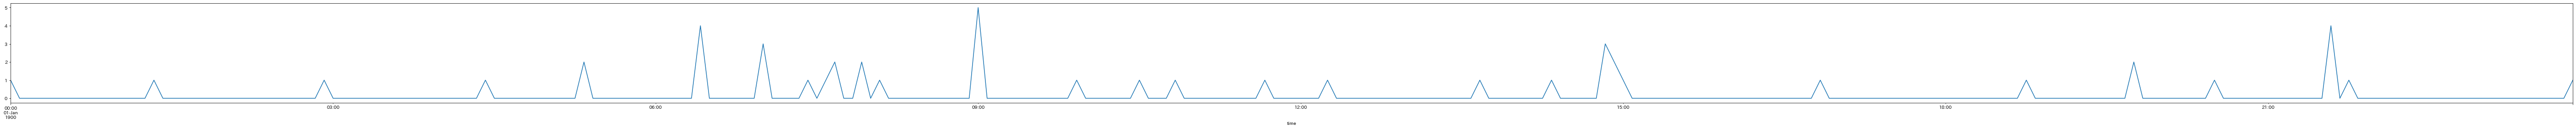

In [137]:
to_day.groupby(pandas.Grouper(key='time', freq='05T')).count()['day'].plot(figsize=(100,4))